# Sampleo por Rechazo

Es importante mantener la idea de que los algoritmos de numeros pseudo aleatorios solo nos brindan un numero entre 0 y 1 con distribucion uniforme.

Si queremos samplear una V.A $X$, vimos 2 maneras de hacerlo:

- Si conocemos $F_X$, utilizamos el método de la **funcion inversa**.
- Si **NO** conocemos a $F_X$ pero justo $X$ de distribuye de forma *normal*, podeoms utilizar el método **Box Muller**.

Si no caemos en los 2 escenarios anteriores, debemos utilizar un nuevo método. En esta clase verémos el método de **sampleo por rechazo**.


# Paso a Paso del Método:


- **Elegir una Distribución de Propuesta $q(z)$**: Tiene que ser facil de muestrear y tiene que cubrir el mismo soporte (en la practica vale aproximarlo) a nuestra funcion objetivo $p(z)$. Idealmente $q(z)$ debe ser similar a $p(x)$.

- **Eleji a $K$:** Elegir una constante $K$ tal que $K \cdot q(z) \geq p(z)$

- **Generar $z_0$:** Realizar un sampleo de $q(z)$

- **Generar $u_0$:** Realizar un sampleo de $U_0 ∼ U[0, kq(z_0)]$

- **Aceptar o Rechazar:** Si $u_0 \leq p(z_0)$, aceptamos a $u_0$. Si no es así, la rechazamos.


# Objetivo


El objetivo va a ser samplear a la distribucion (no normalizada)

$$p(x) = e^{-\frac{x^2}{2}} \left( \sin^2(6+x) + 3 \cdot \cos^2(x) \cdot \sin^2(4x) + 1 \right)
,$$

cuya distribucion acumulada se ve muy muy dificil de encontrar.

# Ejercicio 1

Graficar la funcion $p(x)$ ¿Cuál es su soporte?


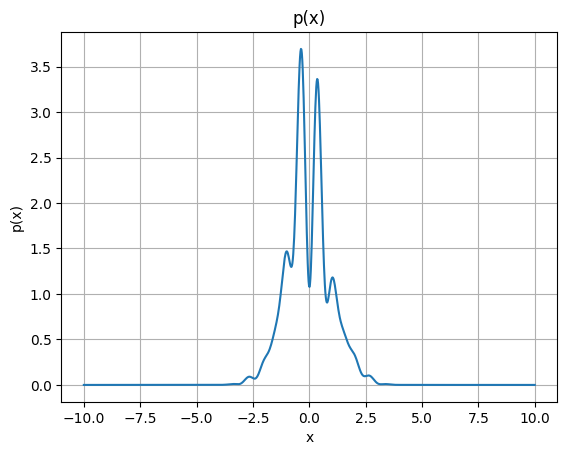

In [2]:
import numpy as np

# p(x)
def p(x):
    term1 = np.exp(-x**2 / 2)
    term2 = np.sin(6 + x)**2
    term3 = 3 * np.cos(x)**2 * np.sin(4 * x)**2
    return term1 * (term2 + term3 + 1)

# Graficar p(x)
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 1000)
plt.plot(x, p(x))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('p(x)')
plt.grid()
plt.show()




# Ejercicio 2

Utilizar el método de Sampleo por Rechazo.


2.1  
- Utilizar una Uniforme(a,b) como $q(z)$
- Encontrar un $K_1$ válido
- ¿Cual es la proporcion de aceptacion para nuestro sampleo?
- Realizar un histograma de la aproximacion de $p(z)$

2.2
- Utilizar una Normal($\mu, σ^2$) como $q(z)$
- Encontrar un $K_2$ válido.
- ¿Cual es la proporcion de aceptacion para nuestro sampleo?
- Realizar un histograma de la aproximacion de $p(z)$


OPCIONAL (Recomendado):

- Para practicar sus habilidades en sampleo, utilizar unicamente Uniformes(0,1) para realizar este ejericio.

- Hacer un plot mostrando en color rojo si el par $(z_i, u_i) \geq p(z)$ y verde si sucede lo contrario.





In [1]:
# Ejercicio 2 - Sampleo por Rechazo

# Ejercicio 2.1 - CASO UNIFORME

import scipy.stats as stats
#Utilizar una Uniforme(a,b) como q(z)
# Encontrar un K_1 válido
# ¿Cual es la proporcion de aceptacion para nuestro sampleo?
# Realizar un histograma de la aproximacion de p(z)
q_z = stats.uniform(loc=-5, scale=10)
n = 10000


for k in range(1000):
    if k*1/10 > 3.6:
        print(k)
        break
k = 37
x = np.linspace(-10, 10, 1000)
plt.plot(x, p(x))
plt.plot(x, k*q_z.pdf(x))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('p(x)')
plt.grid()
plt.show()

z = q_z.rvs(n)
u = stats.uniform(0, k/10).rvs(n)
z_accepted = []

for i in range(n):
    if u[i] < p(z[i]):
        z_accepted.append(z[i])


plt.hist(z_accepted, bins=100, density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('p(x)')
plt.grid()
plt.show()




# Ejercicio 2.2 - CASO NORMAL
n_z = stats.norm(loc=0, scale=1)
#Utilizar una Normal(0,5) como q(z)
# Encontrar un K_2 válido
# ¿Cual es la proporcion de aceptacion para nuestro sampleo?
# Realizar un histograma de la aproximacion de p(z)


k = 10
x = np.linspace(-10, 10, 1000)
plt.plot(x, p(x))
plt.plot(x, k*n_z.pdf(x))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('p(x)')
plt.grid()
plt.show()

z = n_z.rvs(n)
n_accepted = []
for i in range(n):
    u = stats.uniform(0, k*n_z.pdf(z[i])).rvs(1)
    if u < p(z[i]):
        n_accepted.append(z[i])

plt.hist(n_accepted, bins=100, density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('p(x)')
plt.grid()


37


NameError: name 'np' is not defined

# Ejercicio 3

Responder:

- Cual función $q(z)$ aproxima mejor a p(z)? Cual es la proporcion de aceptacion para cada una?

